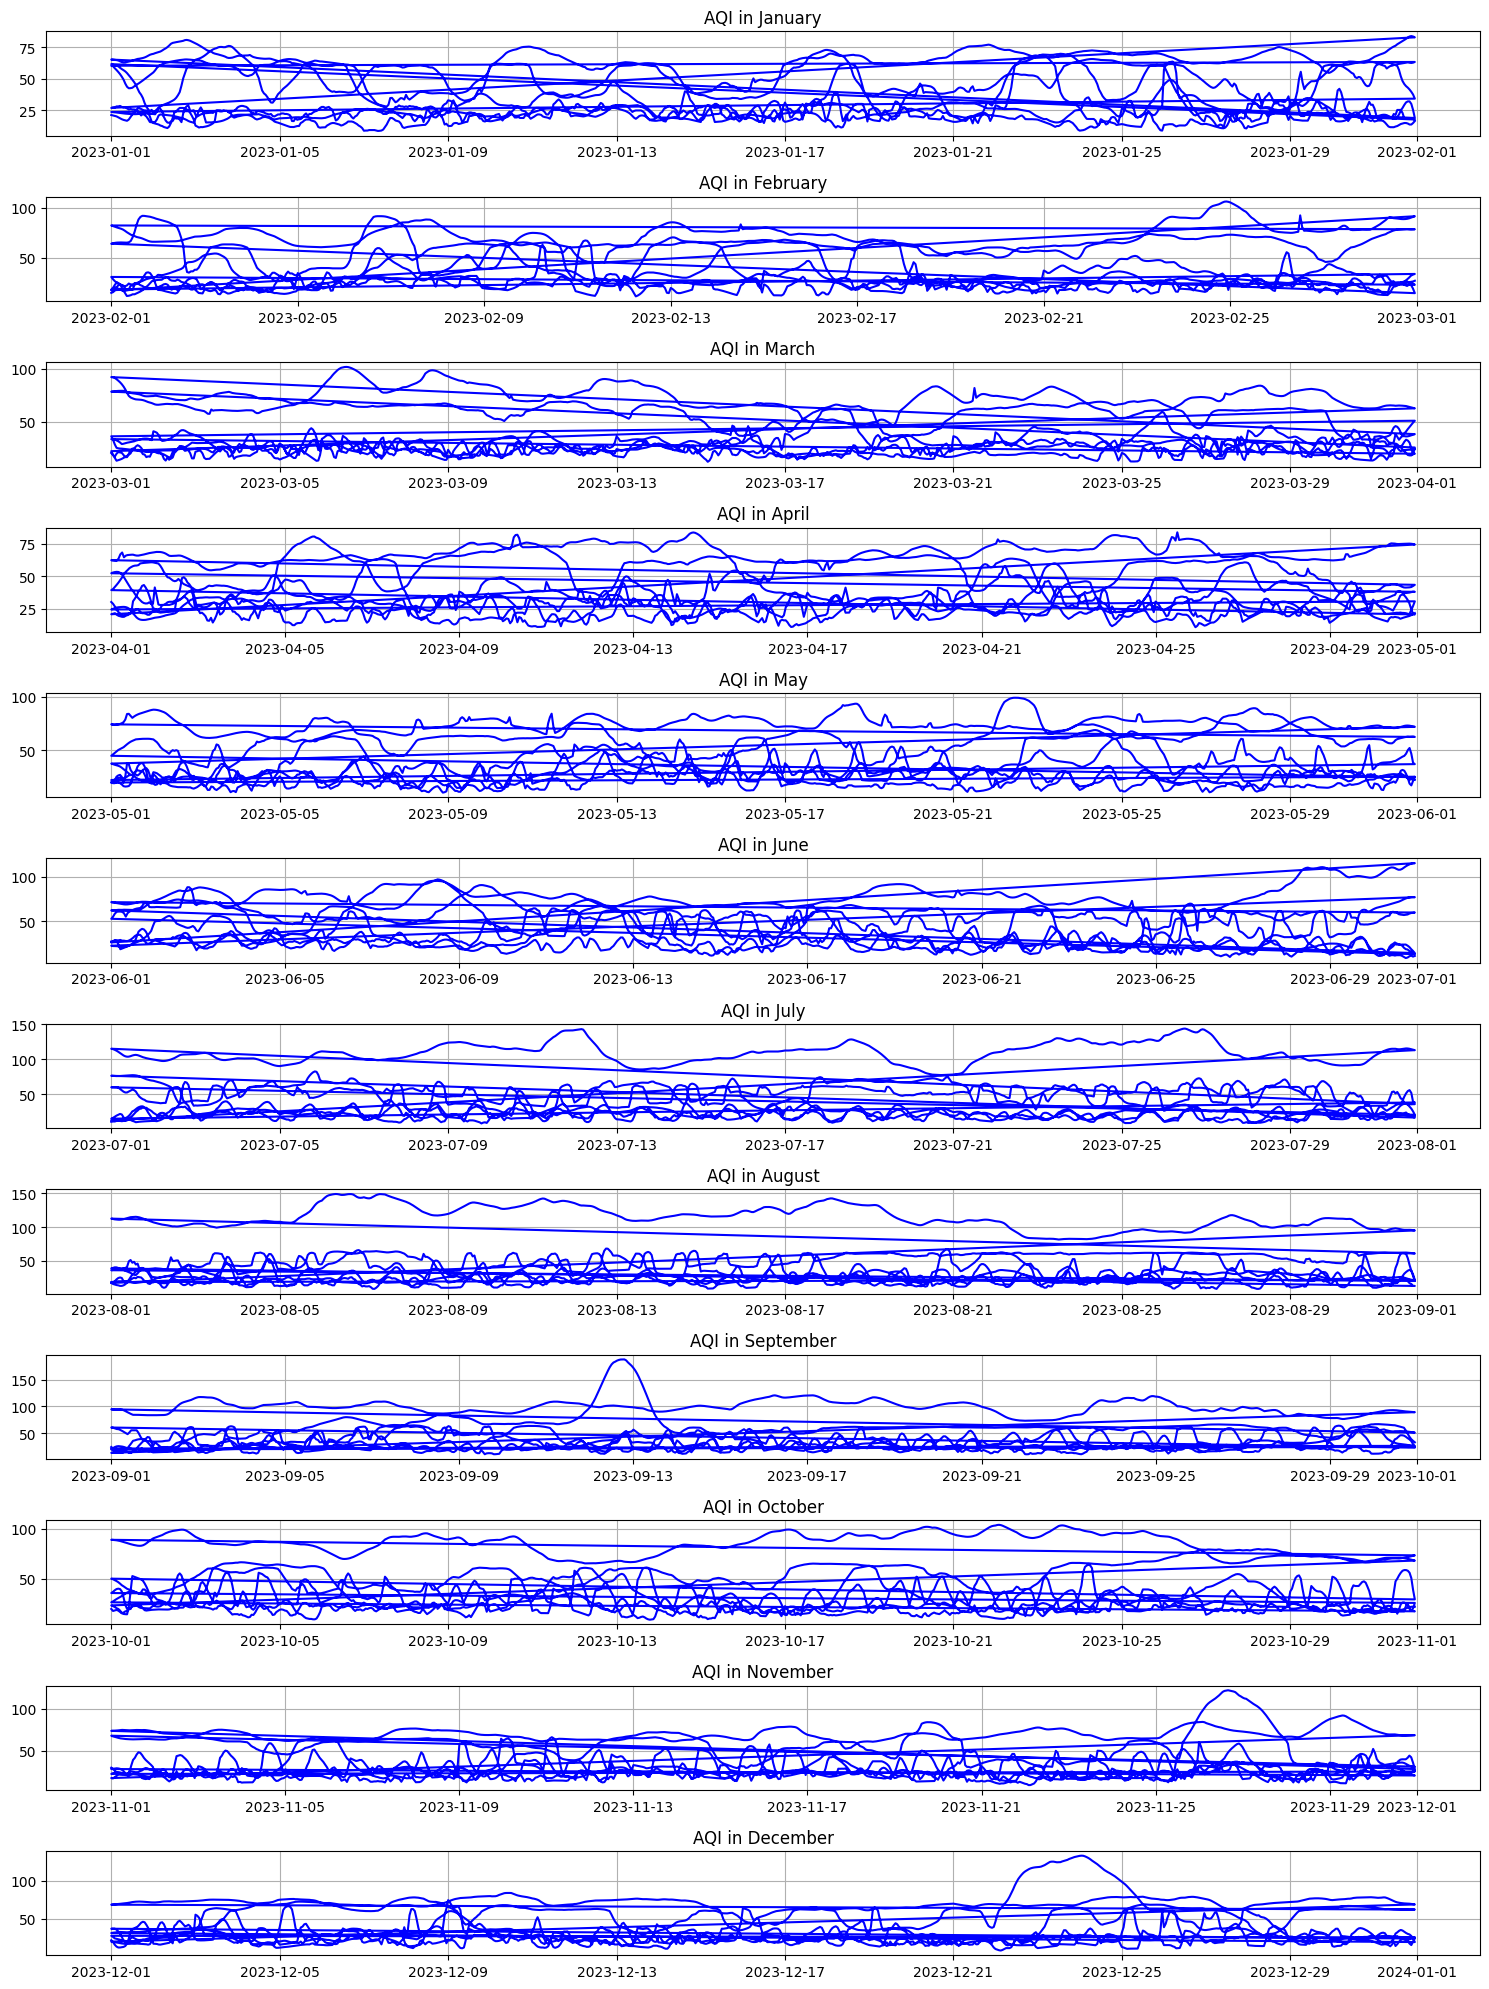

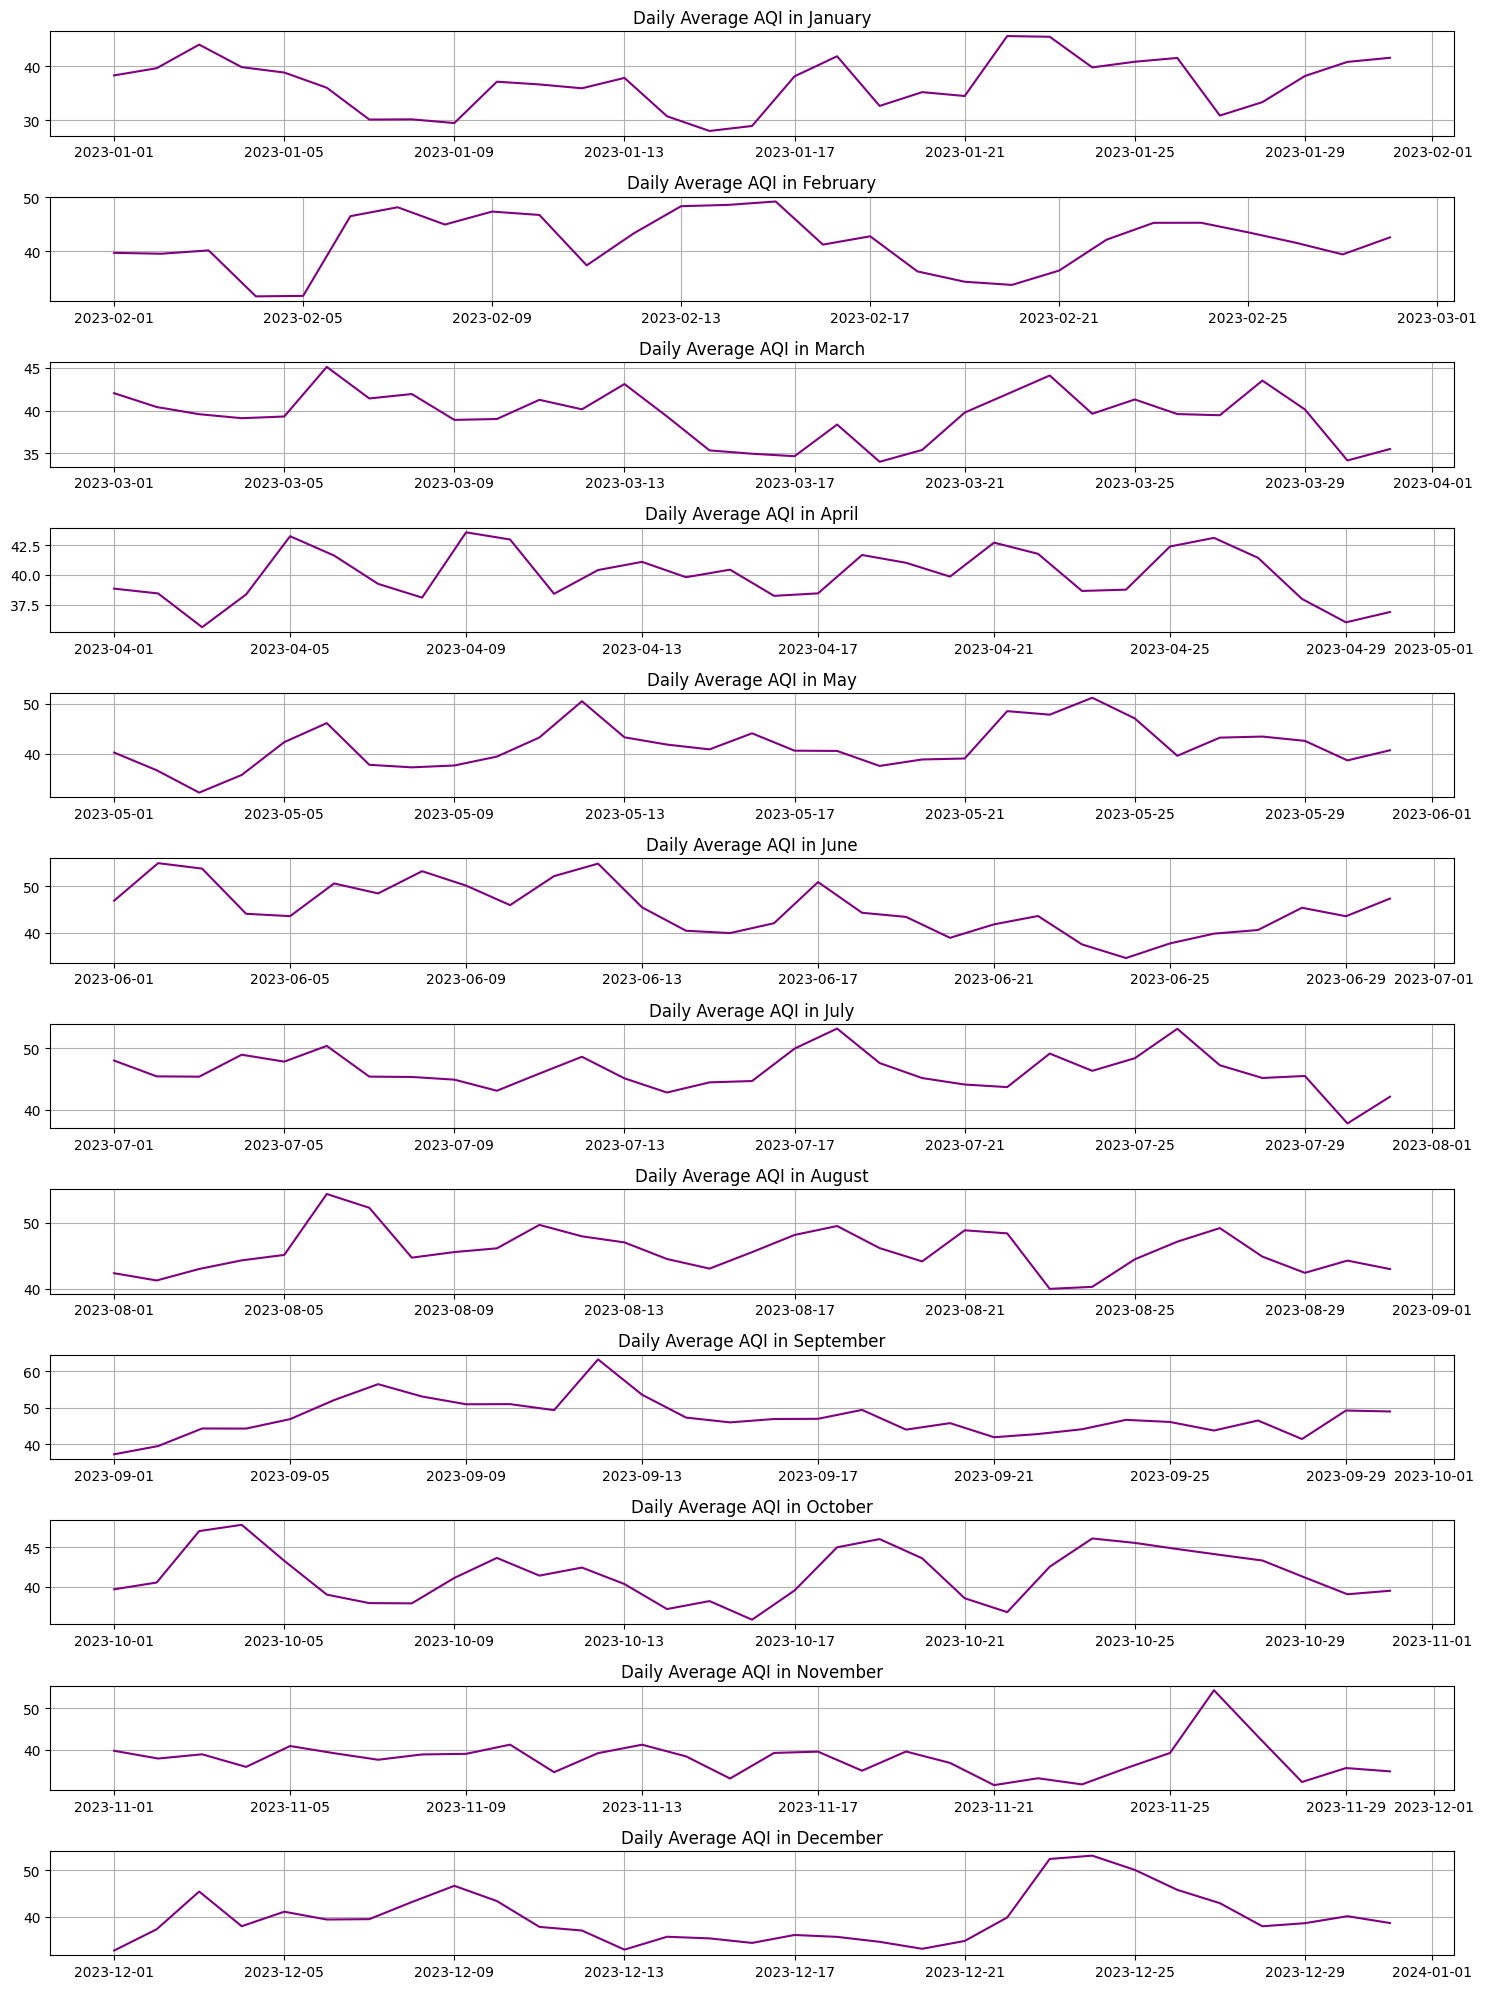

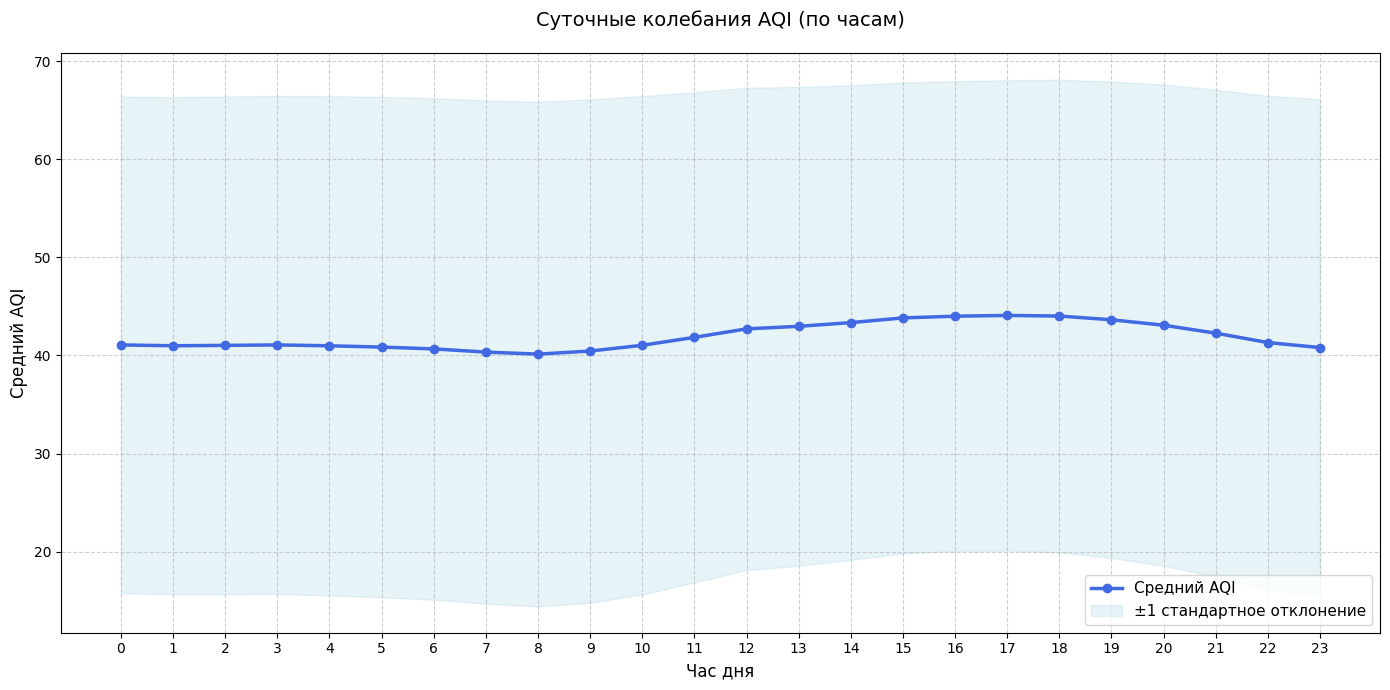

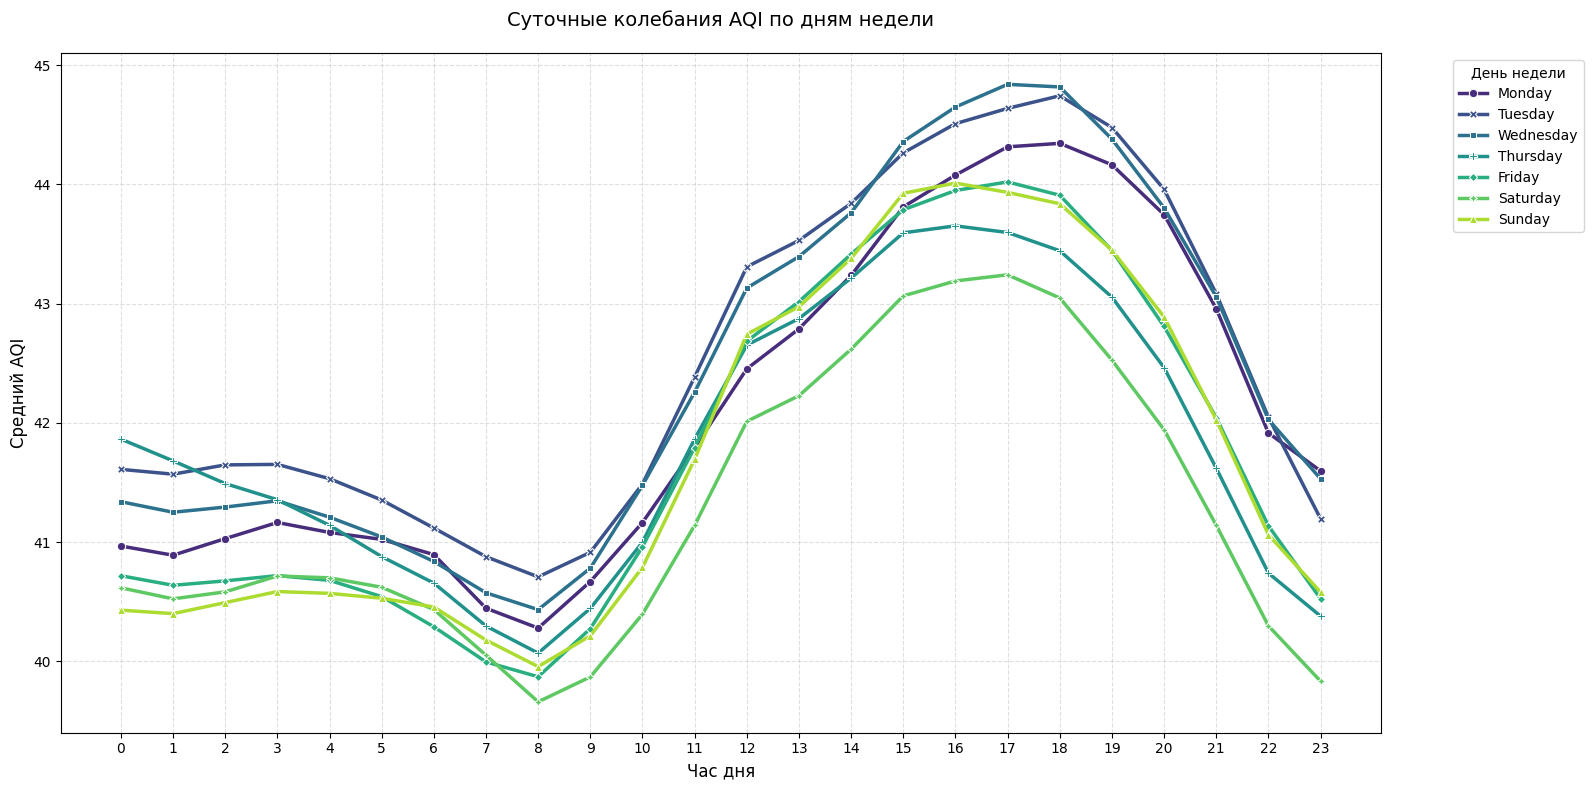

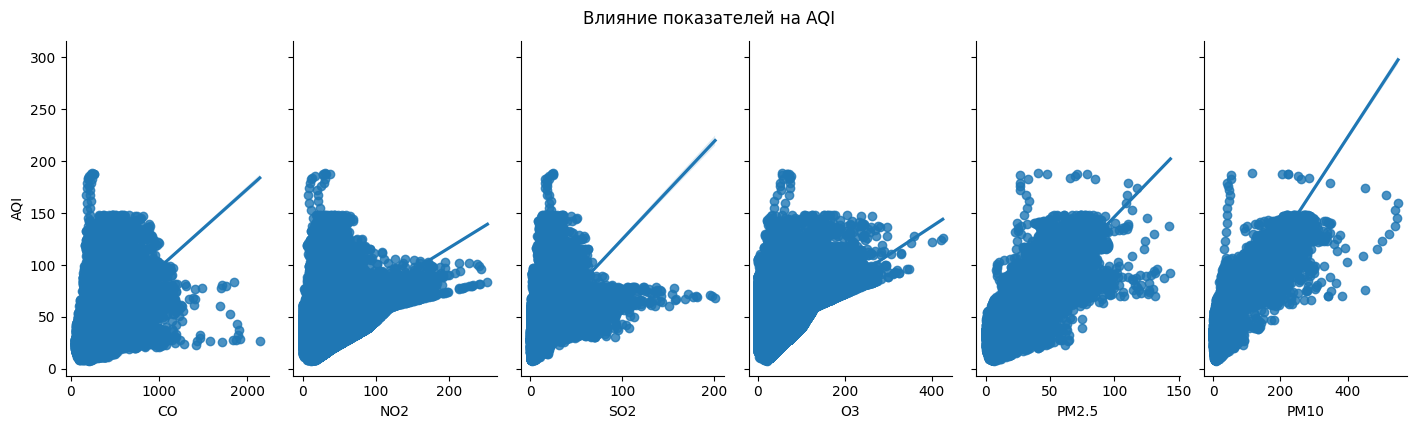

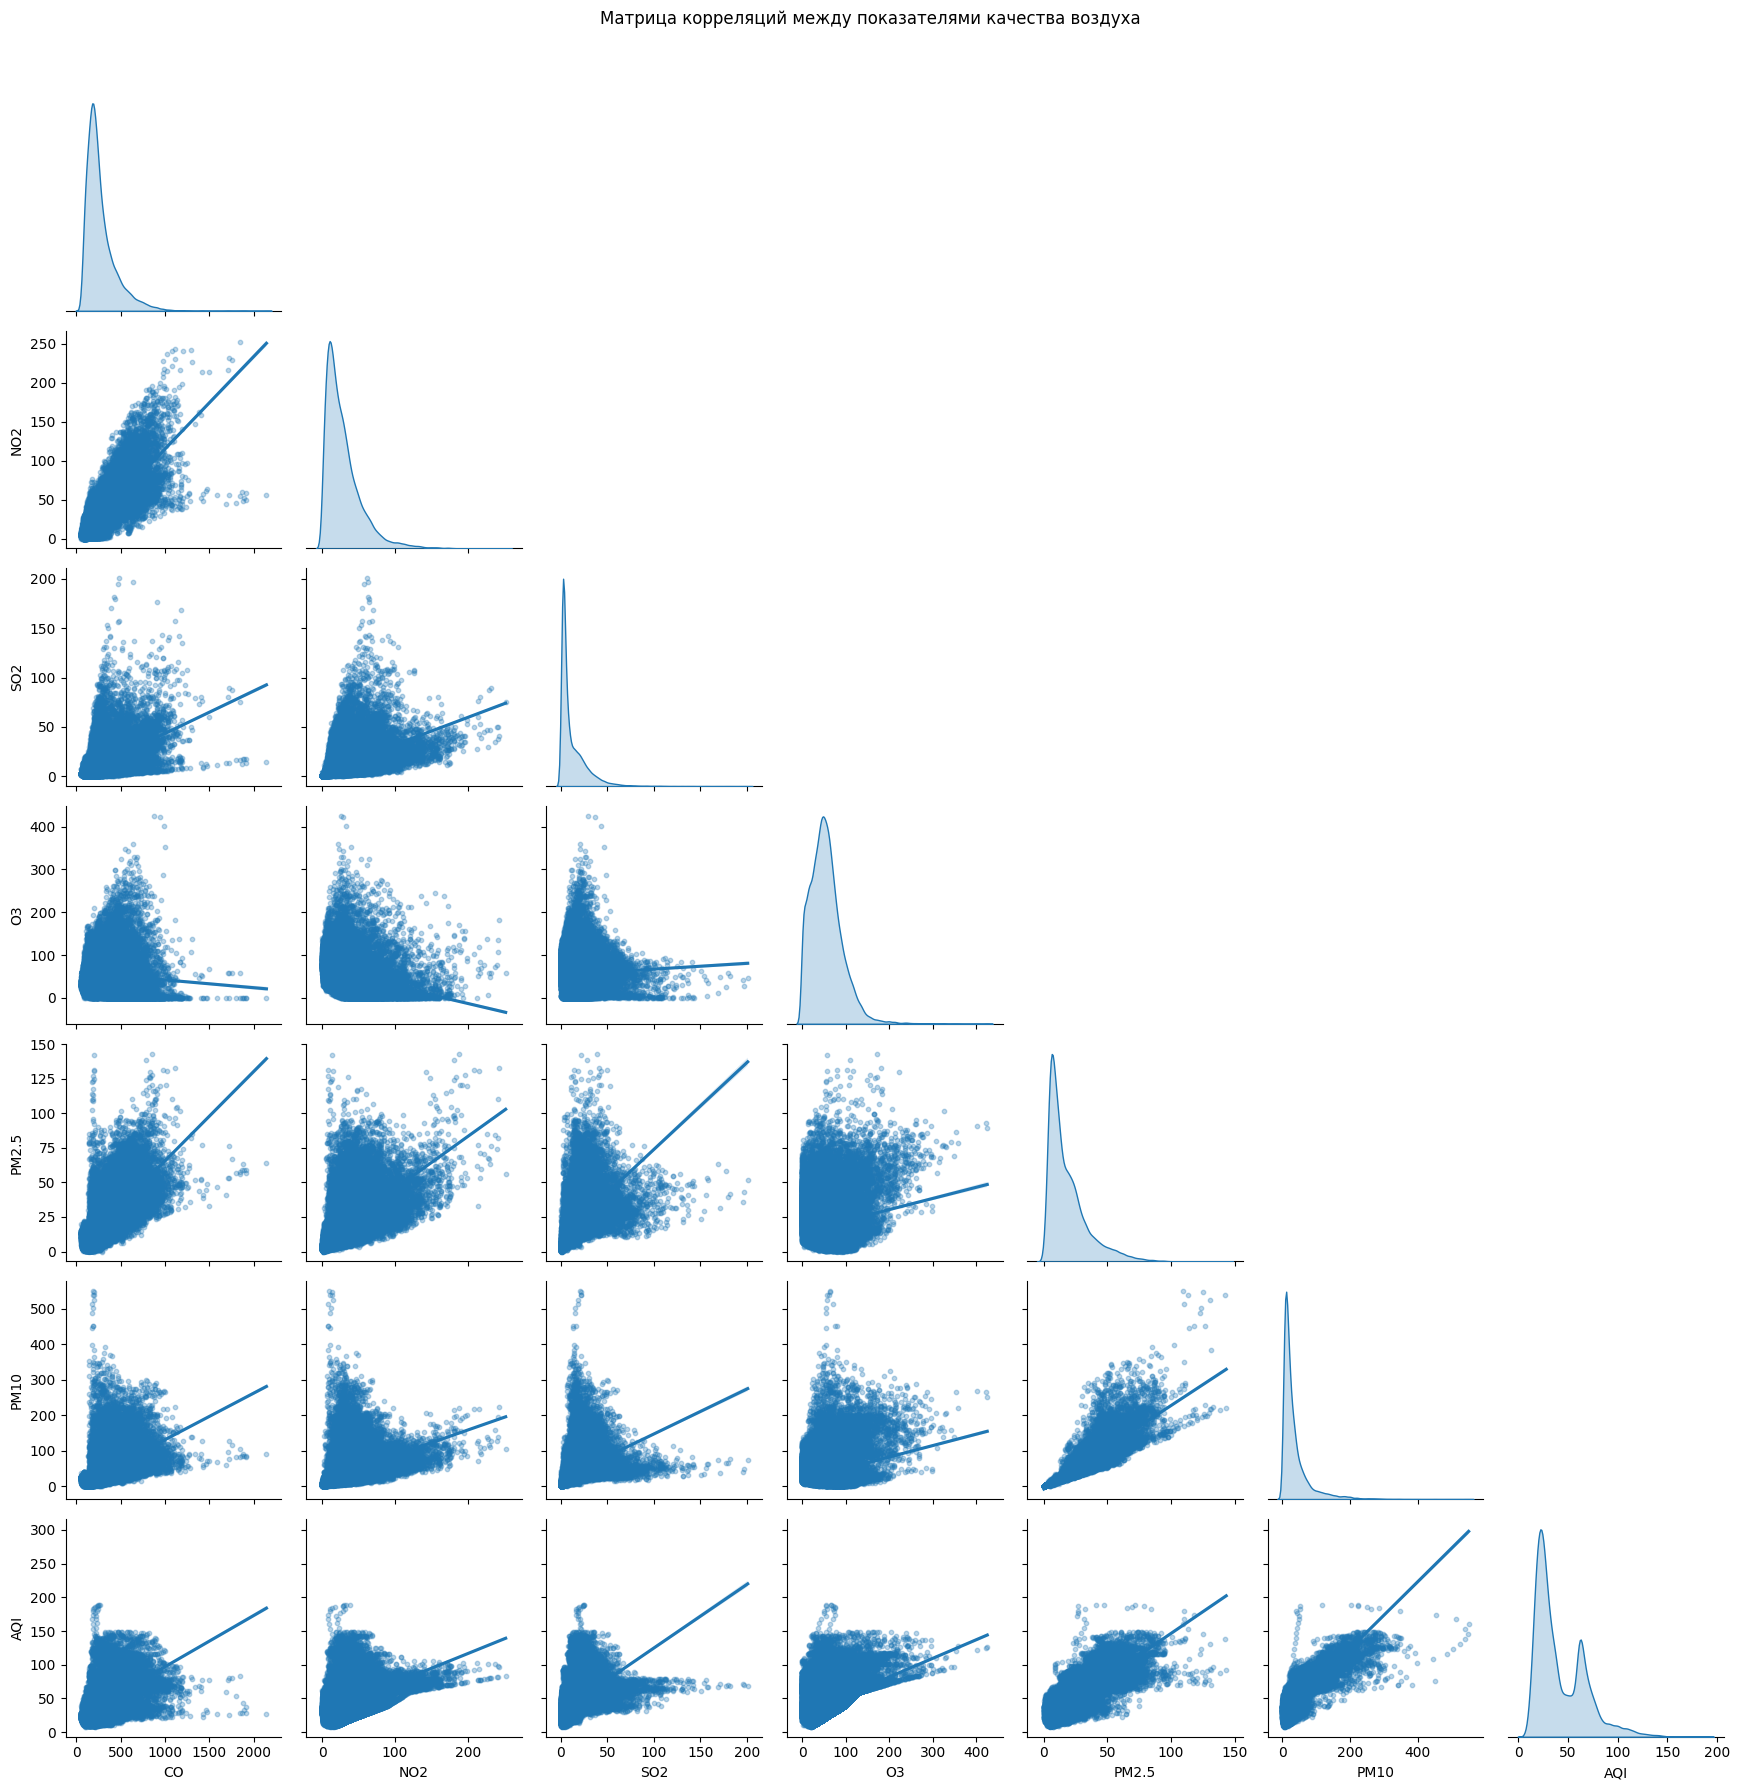

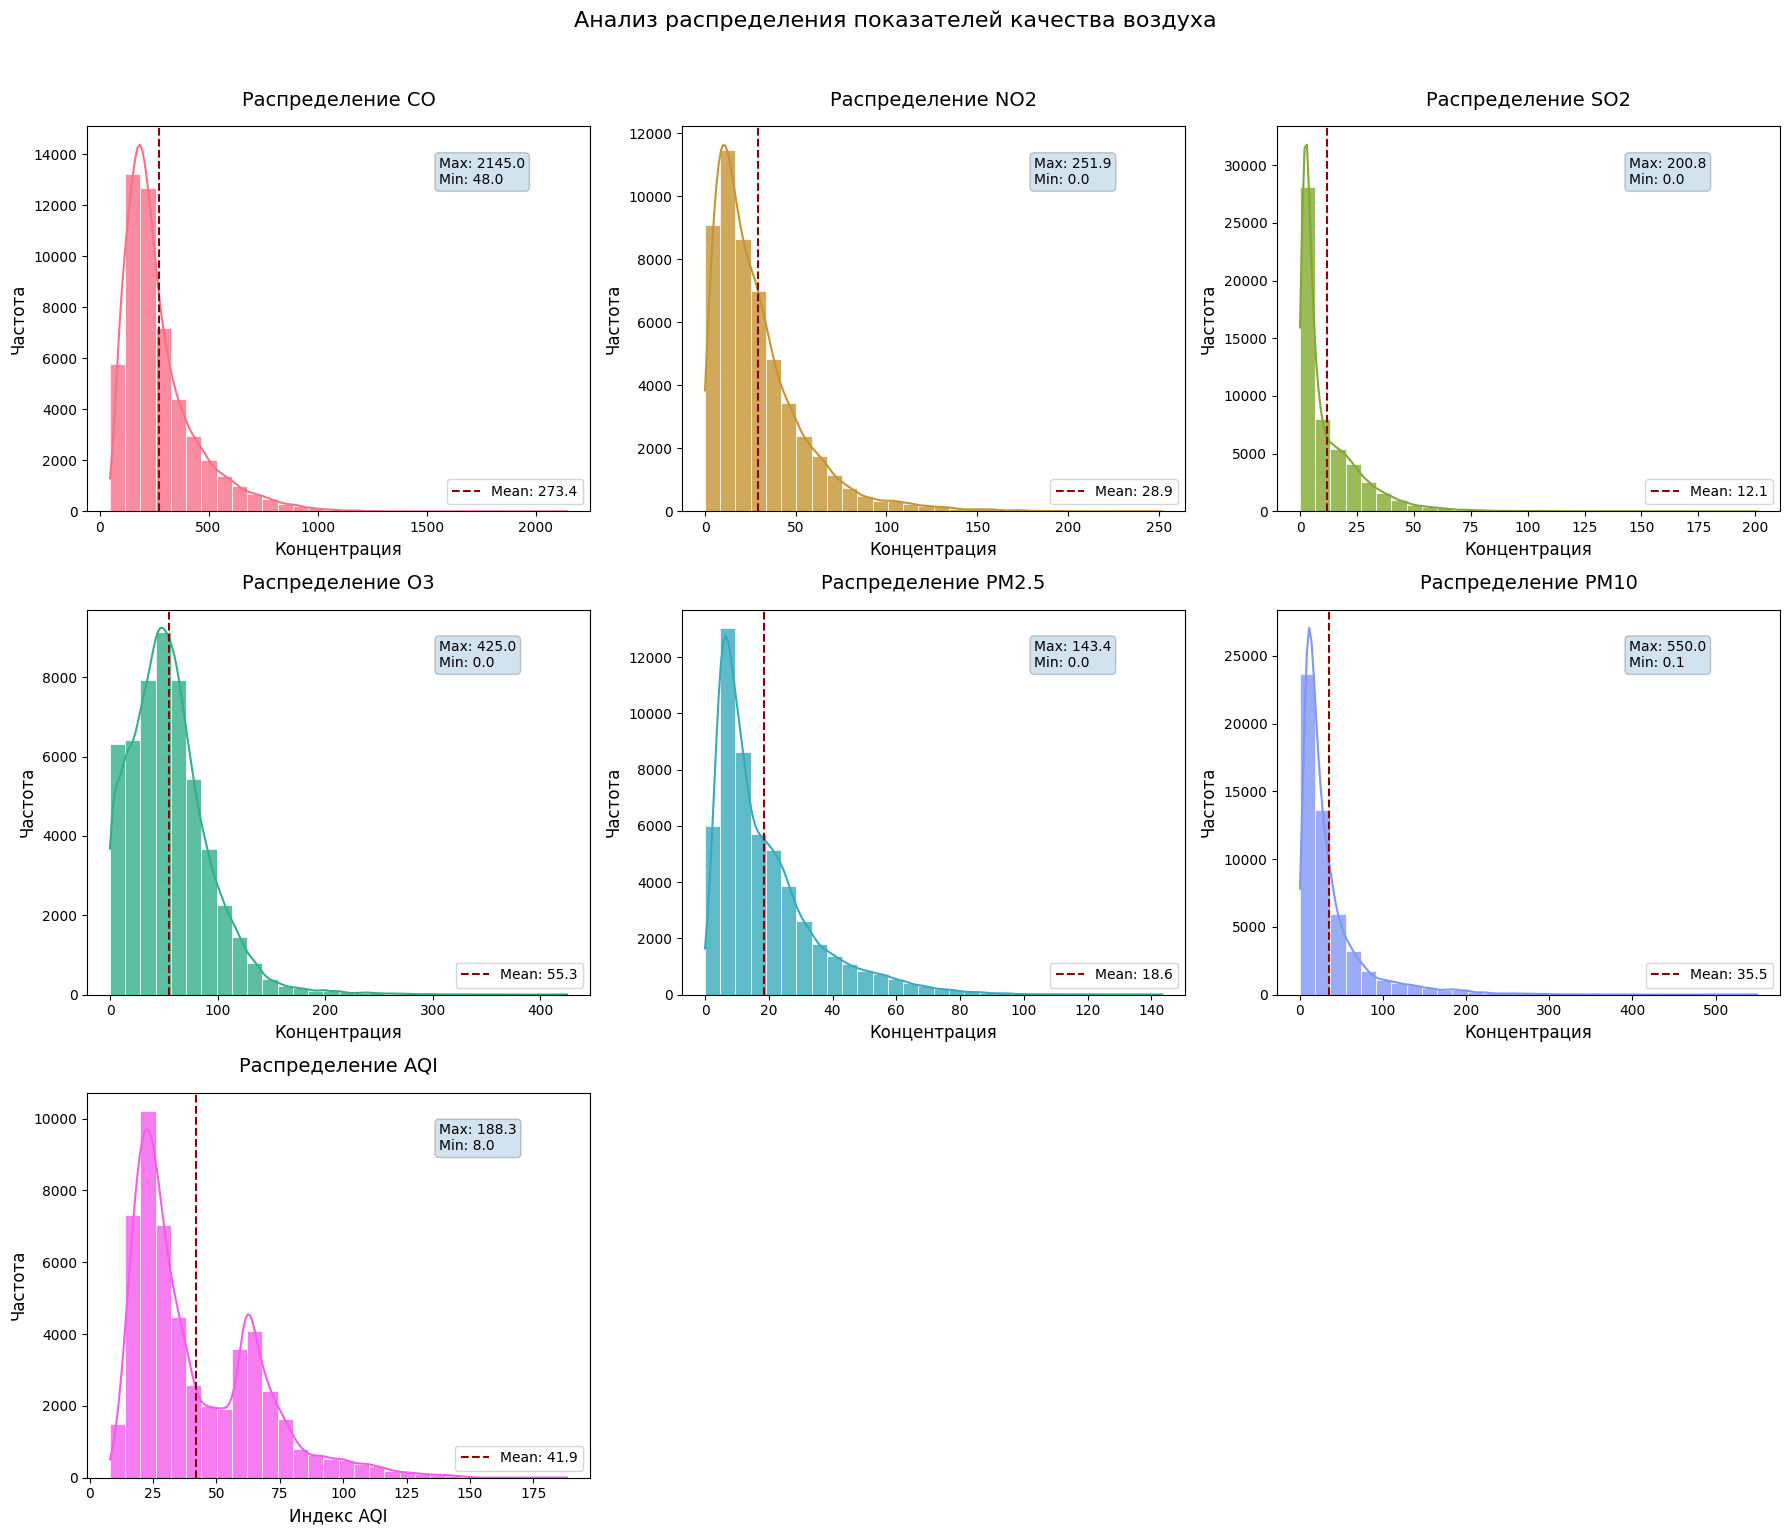

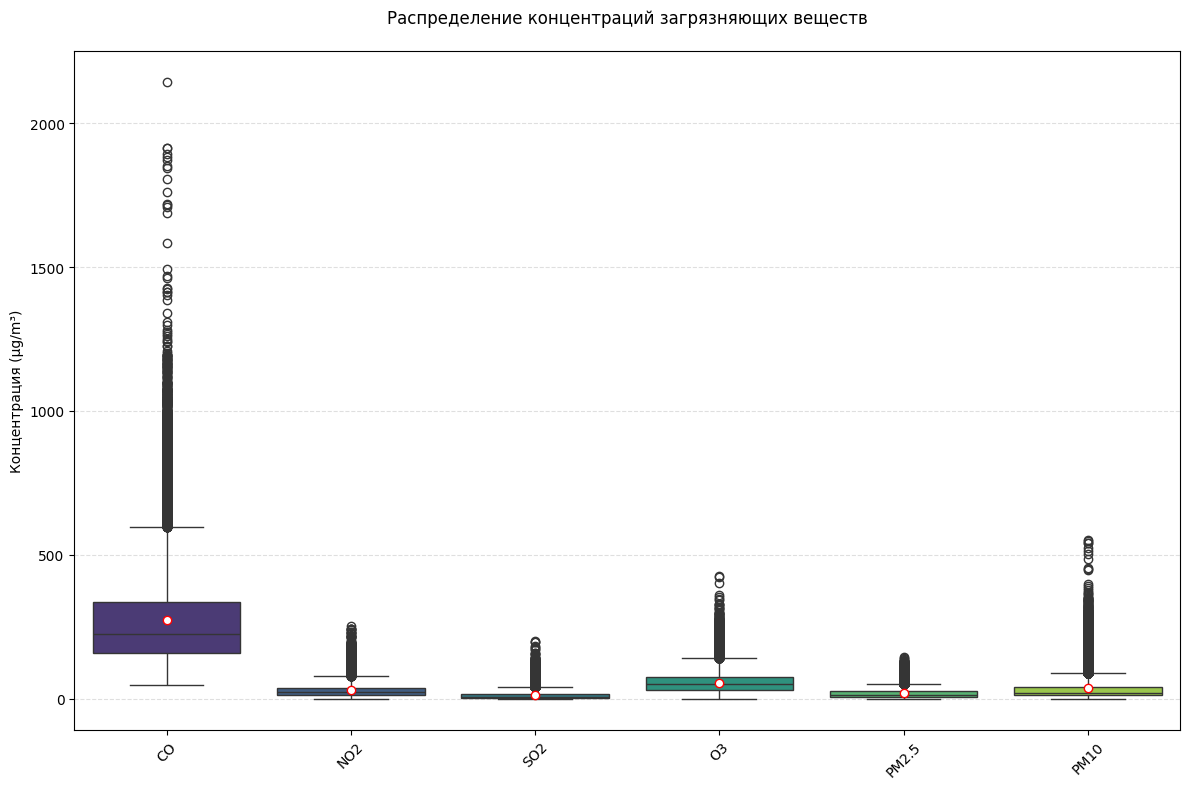

C:\Users\vlade\AppData\Local\Temp\ipykernel_9364\2324221557.py:225: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=main_df[['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']],


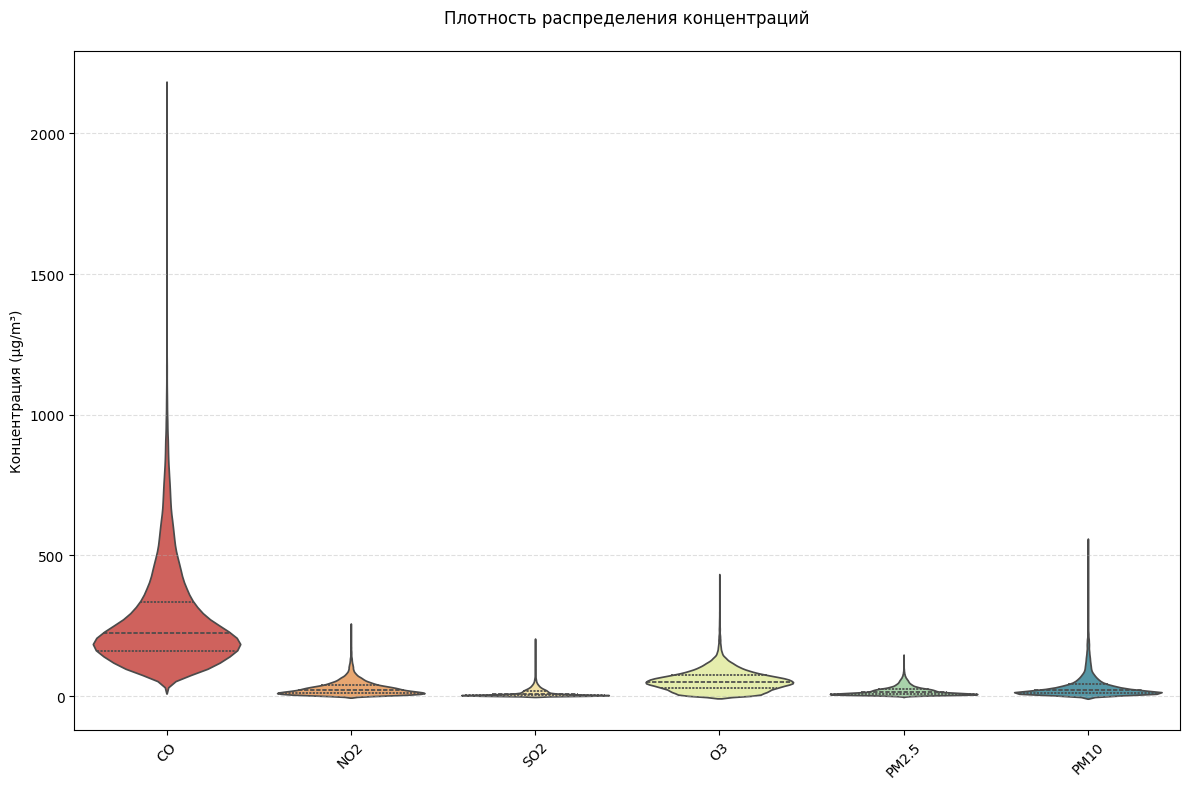

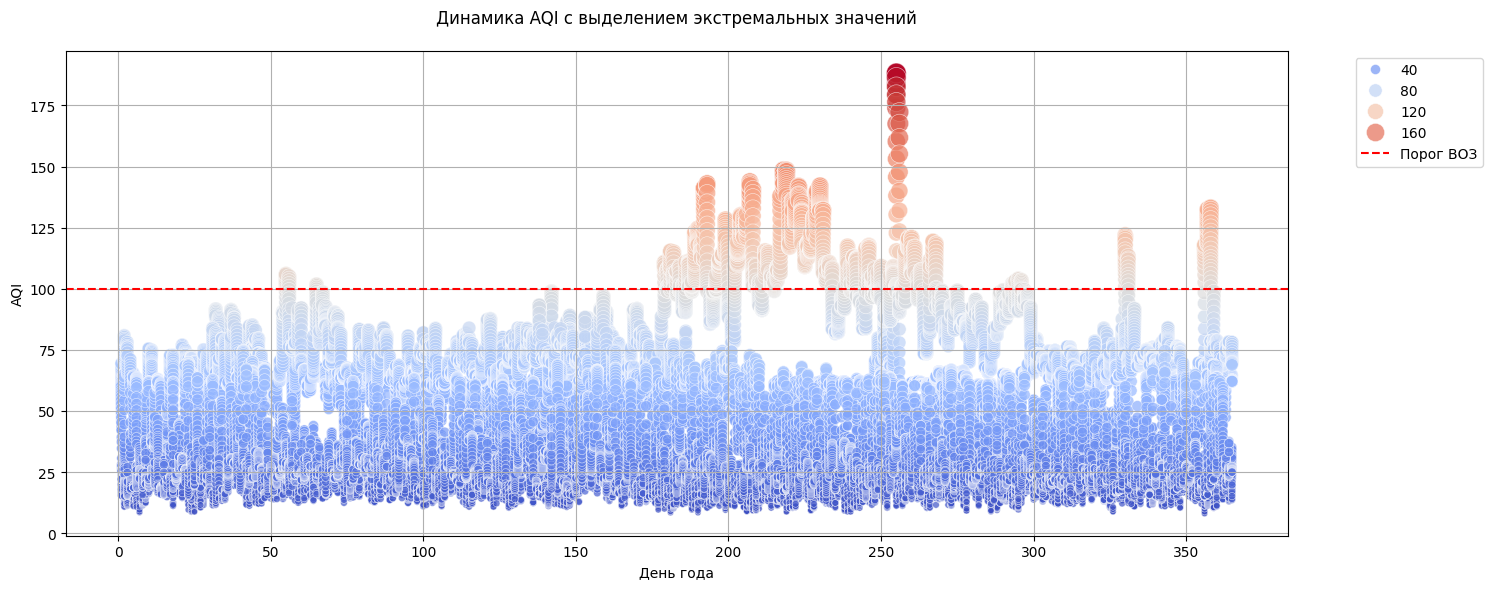

In [6]:

import math
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

main_df = pd.read_csv('Air_Quality.csv', parse_dates=['Date'], encoding='utf-8')

main_df['Month'] = main_df['Date'].dt.month
main_df['Year'] = main_df['Date'].dt.year
main_df['Month_Name'] = main_df['Date'].dt.month_name()
main_df['Day'] = main_df['Date'].dt.day

# Проверка датасета, вывод информации о нем и подсчет пустых значений
# print(main_df.describe(include='all'))

# print(main_df.info())

# for column in main_df.columns:
#     count_isna = main_df[column].isna().sum()
#     print(f"{column} has {count_isna} empty values")

# print(main_df.head(5))



# График AQI по месяцам
plt.figure(figsize=(15, 20))
months = main_df['Month'].unique()

for i, month in enumerate(sorted(months), 1):
    plt.subplot(len(months), 1, i)
    month_data = main_df[main_df['Month'] == month]
    plt.plot(month_data['Date'], month_data['AQI'], label=f'Month {month}', color='blue')
    plt.title(f'AQI in {month_data["Month_Name"].iloc[0]}')
    plt.grid(True)

plt.tight_layout()
plt.show()



# График AQI с усредненным значений по дням для каждого месяца
daily_avg = main_df.groupby(['Year', 'Month', 'Day']).agg({'AQI': 'mean'}).reset_index()
daily_avg['Date'] = pd.to_datetime(daily_avg[['Year', 'Month', 'Day']])
daily_avg['Month_Name'] = daily_avg['Date'].dt.month_name() 

plt.figure(figsize=(15, 20))
for i, month in enumerate(sorted(main_df['Month'].unique()), 1):
    plt.subplot(len(main_df['Month'].unique()), 1, i)
    month_data = daily_avg[daily_avg['Month'] == month]
    plt.plot(month_data['Date'], month_data['AQI'], label=f'Month {month}', color='purple')
    plt.title(f'Daily Average AQI in {month_data["Month_Name"].iloc[0]}')
    plt.grid(True)

plt.tight_layout()
plt.show()



# Средние значения AQI по часам
main_df['Hour'] = main_df['Date'].dt.hour
main_df['Weekday'] = main_df['Date'].dt.day_name()

hourly_avg = main_df.groupby('Hour').agg({
    'AQI': ['mean', 'std']
}).reset_index()
hourly_avg.columns = ['Hour', 'AQI_mean', 'AQI_std']

plt.figure(figsize=(14, 7))

plt.plot(hourly_avg['Hour'], hourly_avg['AQI_mean'], 
         color='royalblue', 
         linewidth=2.5,
         marker='o',
         label='Средний AQI')

plt.fill_between(hourly_avg['Hour'],
                 hourly_avg['AQI_mean'] - hourly_avg['AQI_std'],
                 hourly_avg['AQI_mean'] + hourly_avg['AQI_std'],
                 color='lightblue',
                 alpha=0.3,
                 label='±1 стандартное отклонение')

plt.title('Суточные колебания AQI (по часам)', fontsize=14, pad=20)
plt.xlabel('Час дня', fontsize=12)
plt.ylabel('Средний AQI', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()

plt.show()



# Средние значения AQI по дням недели и по часам
main_df['Hour'] = main_df['Date'].dt.hour
main_df['Weekday'] = main_df['Date'].dt.day_name()
hourly_weekday_avg = main_df.groupby(['Hour', 'Weekday']).agg({
    'AQI': 'mean'
}).reset_index()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_weekday_avg['Weekday'] = pd.Categorical(hourly_weekday_avg['Weekday'], 
                                              categories=weekday_order, 
                                              ordered=True)

plt.figure(figsize=(16, 8))
sns.lineplot(data=hourly_weekday_avg, 
             x='Hour', 
             y='AQI', 
             hue='Weekday',
             palette='viridis',
             linewidth=2.5,
             style='Weekday',
             markers=True,
             dashes=False)

plt.title('Суточные колебания AQI по дням недели', fontsize=14, pad=20)
plt.xlabel('Час дня', fontsize=12)
plt.ylabel('Средний AQI', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='День недели', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()



# Зависимость AQI от остальных показателей
sns.pairplot(main_df, 
             x_vars=['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10'],
             y_vars=['AQI'],
             kind='reg',
             height=4,
             aspect=0.6)
plt.suptitle('Влияние показателей на AQI', y=1.05)
plt.show()



# Зависимость показателей качества воздуха друг от друга
pollutants = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']
sns.pairplot(main_df[pollutants], 
             kind='reg',  # Добавляем линии регрессии
             diag_kind='kde',  # Ядерные оценки вместо гистограмм
             plot_kws={'scatter_kws': {'alpha': 0.3, 's': 10}},
             corner=True)  # Убираем дублирующиеся графики

plt.suptitle('Матрица корреляций между показателями качества воздуха', y=1.02)
plt.tight_layout()
plt.show()



# Гистограммы для каждого показателя
pollutants = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']
n_cols = 3
n_rows = math.ceil(len(pollutants) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

colors = sns.color_palette("husl", len(pollutants))

for i, (col, color) in enumerate(zip(pollutants, colors)):
    sns.histplot(main_df[col], kde=True, ax=axes[i], 
                 color=color, 
                 bins=30,
                 edgecolor='w',
                 linewidth=0.5,
                 alpha=0.8)
    
    mean_val = main_df[col].mean()
    axes[i].axvline(mean_val, color='darkred', 
                    linestyle='--', 
                    linewidth=1.5,
                    label=f'Mean: {mean_val:.1f}')
    
    axes[i].set_title(f'Распределение {col}', pad=15, fontsize=14)
    axes[i].set_xlabel('Концентрация' if col != 'AQI' else 'Индекс AQI', fontsize=12)
    axes[i].set_ylabel('Частота', fontsize=12)
    axes[i].legend()
    
    annot_text = f"Max: {main_df[col].max():.1f}\nMin: {main_df[col].min():.1f}"
    axes[i].annotate(annot_text, xy=(0.7, 0.85), 
                     xycoords='axes fraction',
                     bbox=dict(boxstyle='round', alpha=0.2))

for j in range(len(pollutants), len(axes)):
    axes[j].axis('off')

plt.suptitle('Анализ распределения показателей качества воздуха', 
             y=1.02, fontsize=16)
plt.tight_layout()
plt.show()



# Анализ выбросов показателей воздуха
plt.figure(figsize=(12, 8))
sns.boxplot(data=main_df[['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']],
            palette="viridis",
            whis=1.5,  # Регулировка чувствительности к выбросам
            showmeans=True,  # Показываем средние значения
            meanprops={"marker":"o", 
                      "markerfacecolor":"white", 
                      "markeredgecolor":"red"})

plt.title('Распределение концентраций загрязняющих веществ', pad=20)
plt.ylabel('Концентрация (µg/m³)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



# Скрипичная диаграмма плотности распределения
plt.figure(figsize=(12, 8))
sns.violinplot(data=main_df[['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']],
               inner="quartile",  # Показываем квартили внутри
               palette="Spectral",
               scale="width")  # Нормализация по ширине

plt.title('Плотность распределения концентраций', pad=20)
plt.ylabel('Концентрация (µg/m³)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



# Анализ выбросов AQI по дням года с установленным ВОЗ порогом
main_df['Day_of_Year'] = main_df['Date'].dt.dayofyear

plt.figure(figsize=(15, 6))
sns.scatterplot(x='Day_of_Year', y='AQI', data=main_df,
                hue='AQI', 
                palette="coolwarm",
                size='AQI',
                sizes=(20, 200),
                alpha=0.7)

plt.title('Динамика AQI с выделением экстремальных значений', pad=20)
plt.xlabel('День года')
plt.ylabel('AQI')
plt.axhline(y=100, color='red', linestyle='--', label='Порог ВОЗ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\vlade\AppData\Local\Temp\ipykernel_9364\3593977558.py:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  main_df['Month_Year'] = main_df['Date'].dt.to_period('M').astype(str)


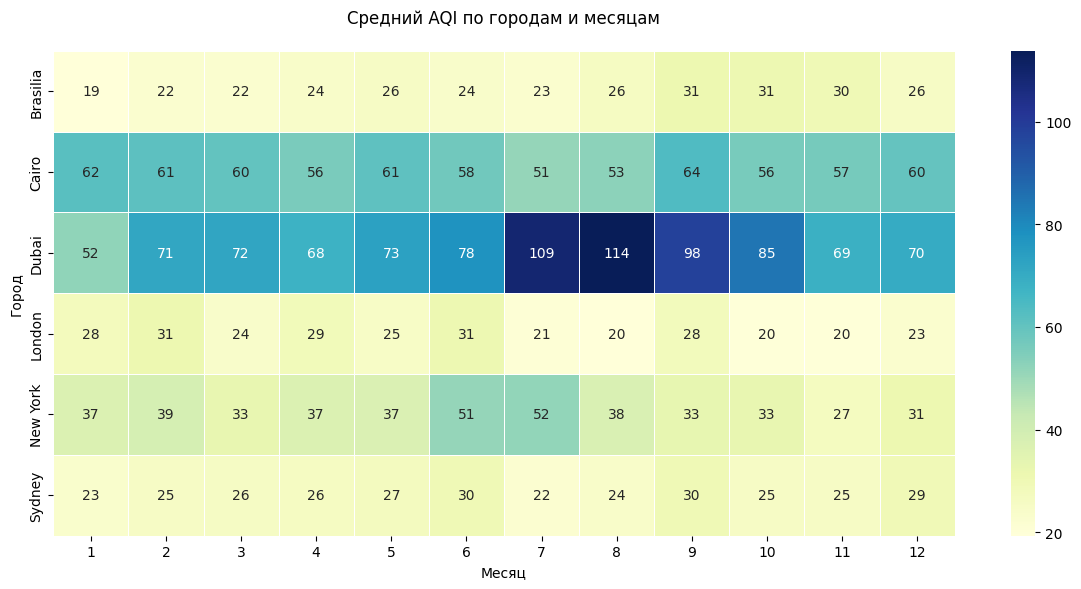

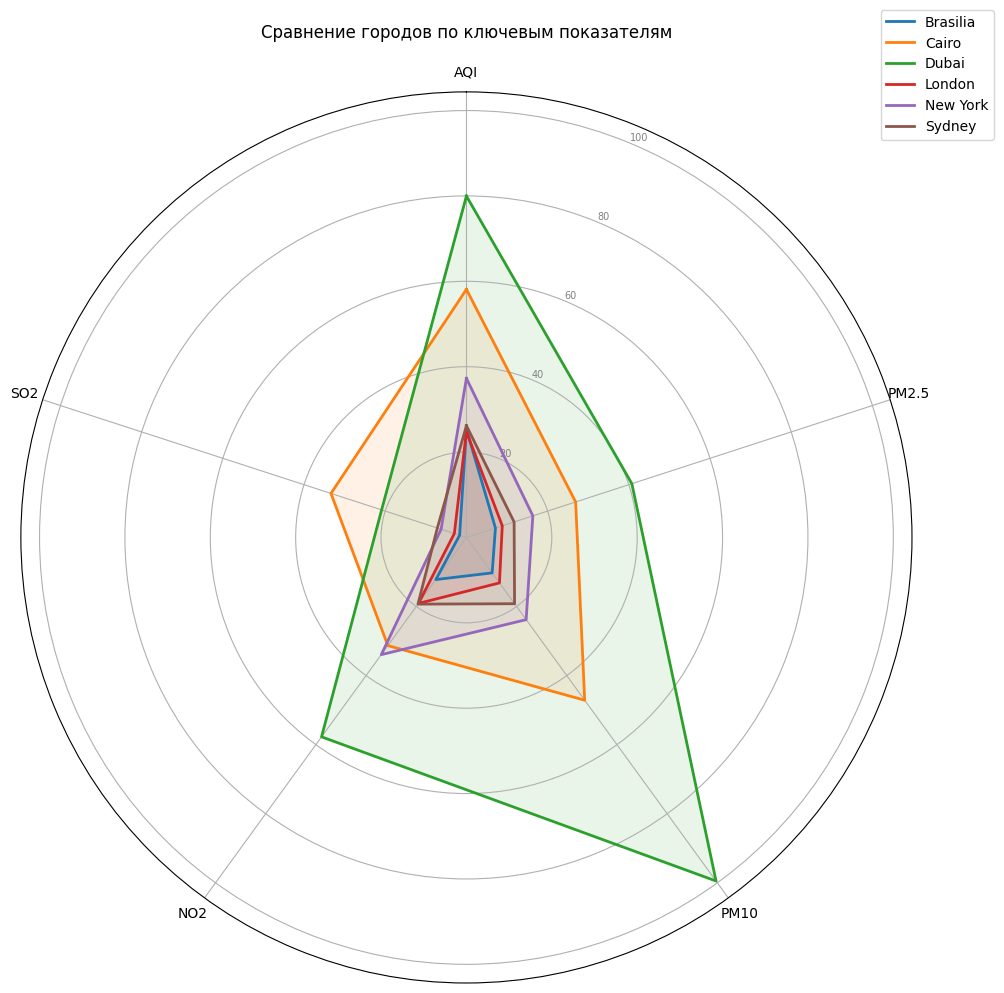

C:\Users\vlade\AppData\Local\Temp\ipykernel_9364\3593977558.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='AQI', data=main_df,


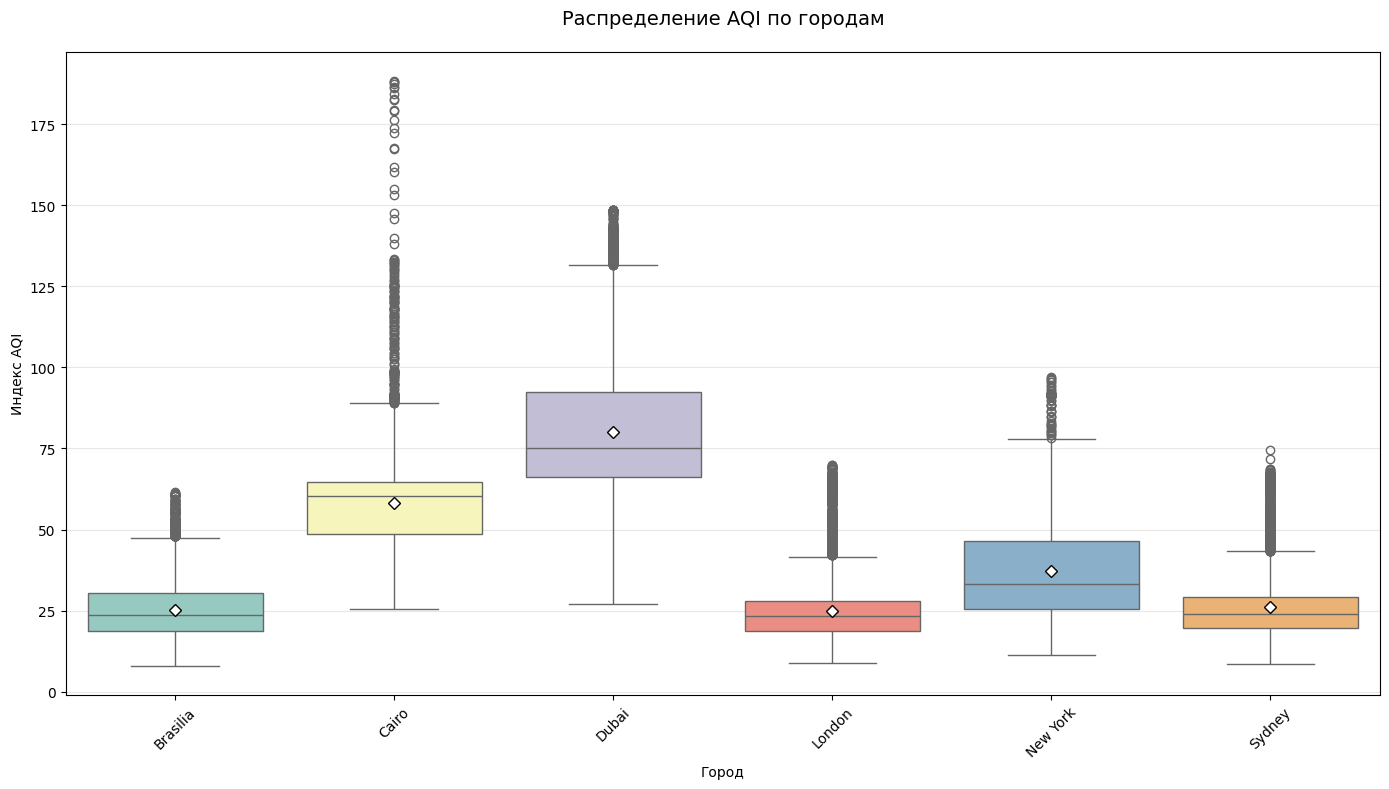

<Figure size 1500x1000 with 0 Axes>

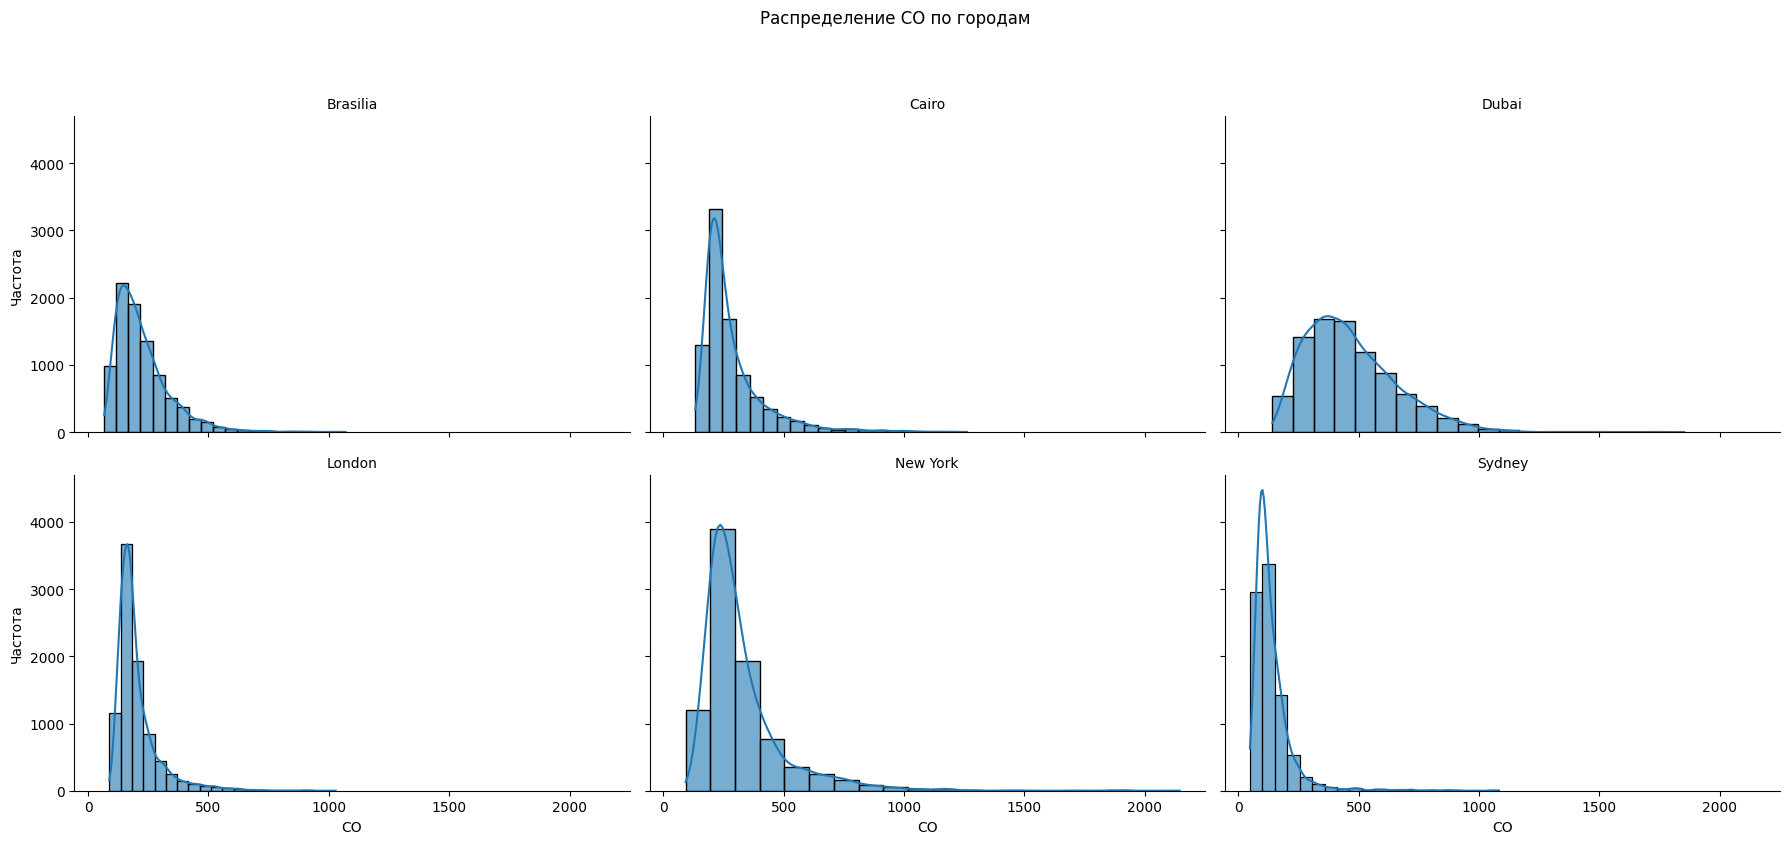

<Figure size 1500x1000 with 0 Axes>

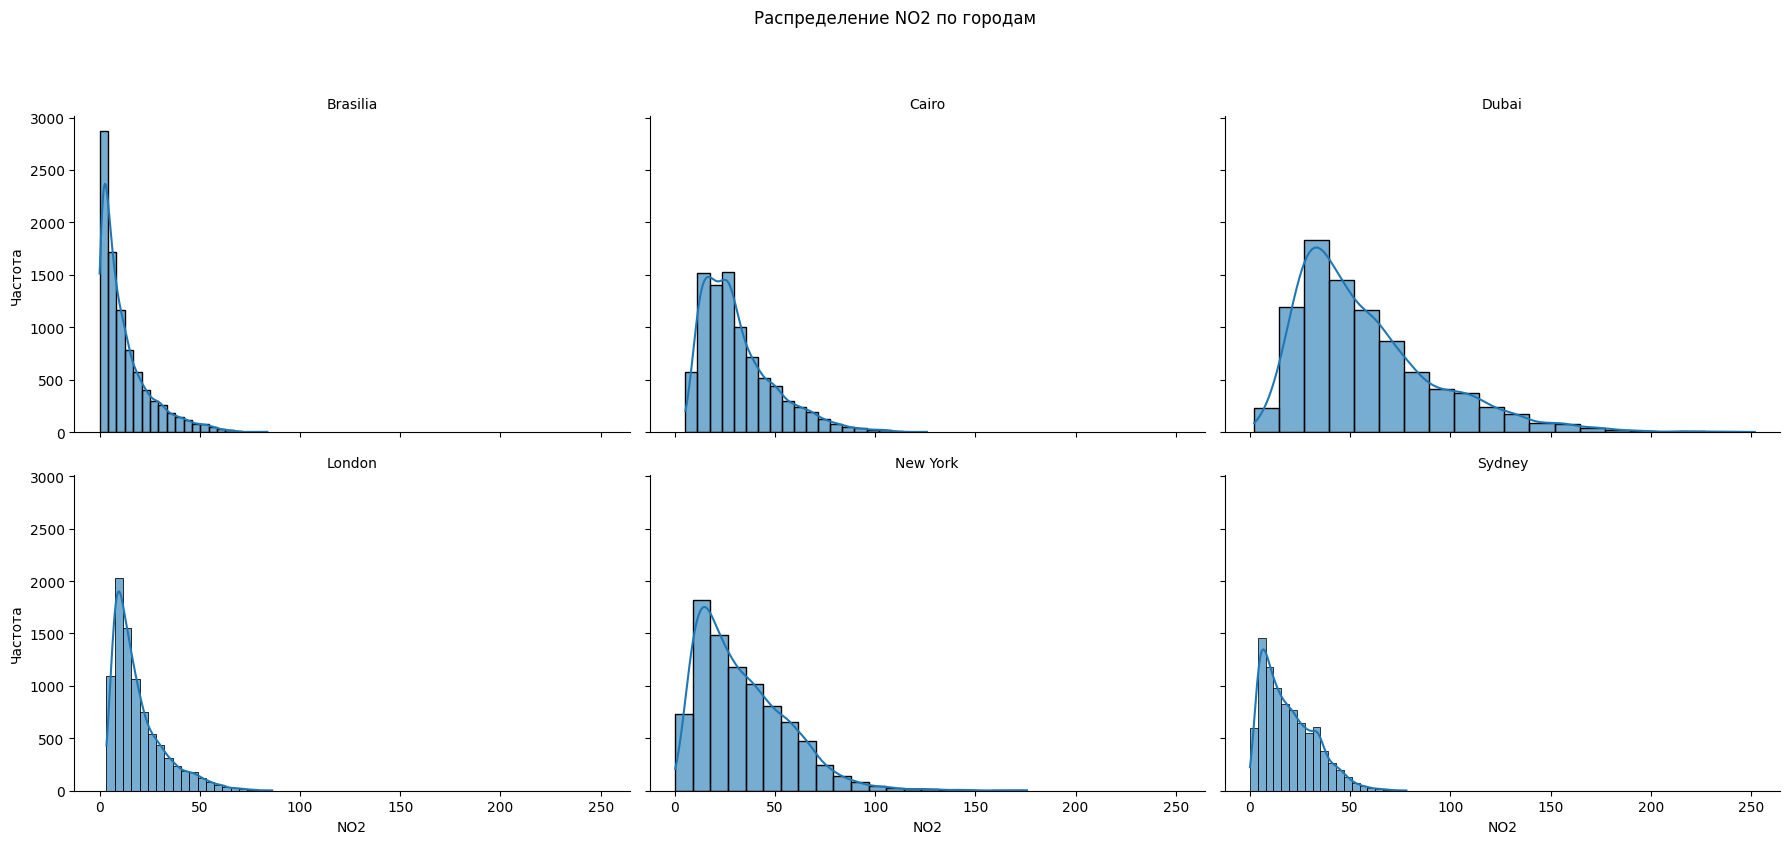

<Figure size 1500x1000 with 0 Axes>

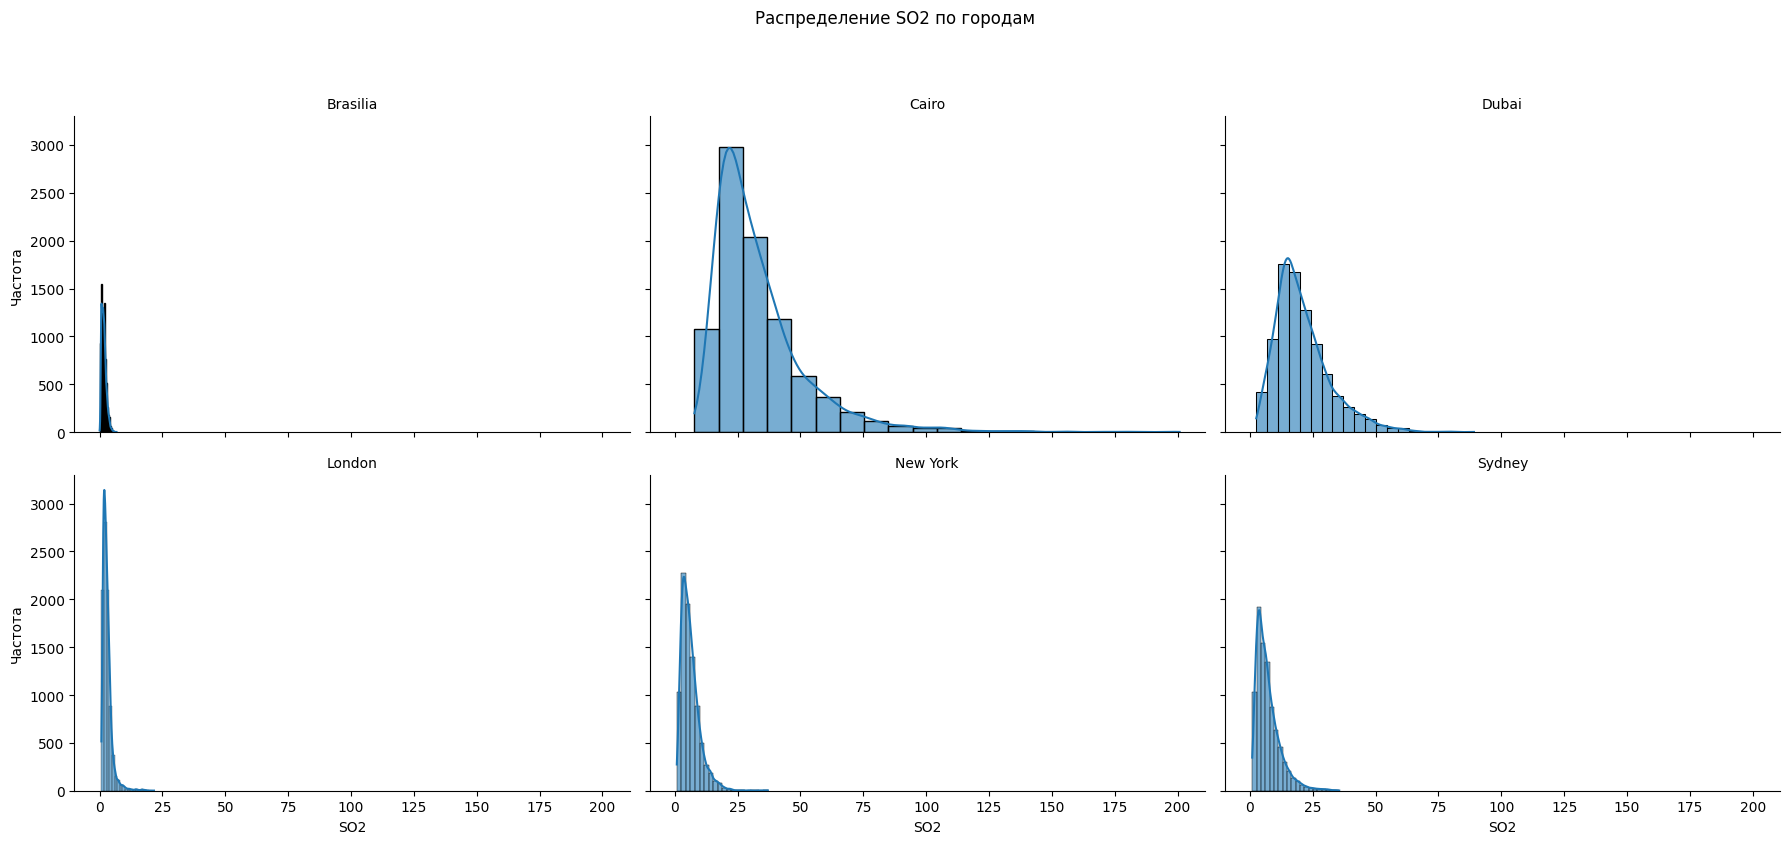

<Figure size 1500x1000 with 0 Axes>

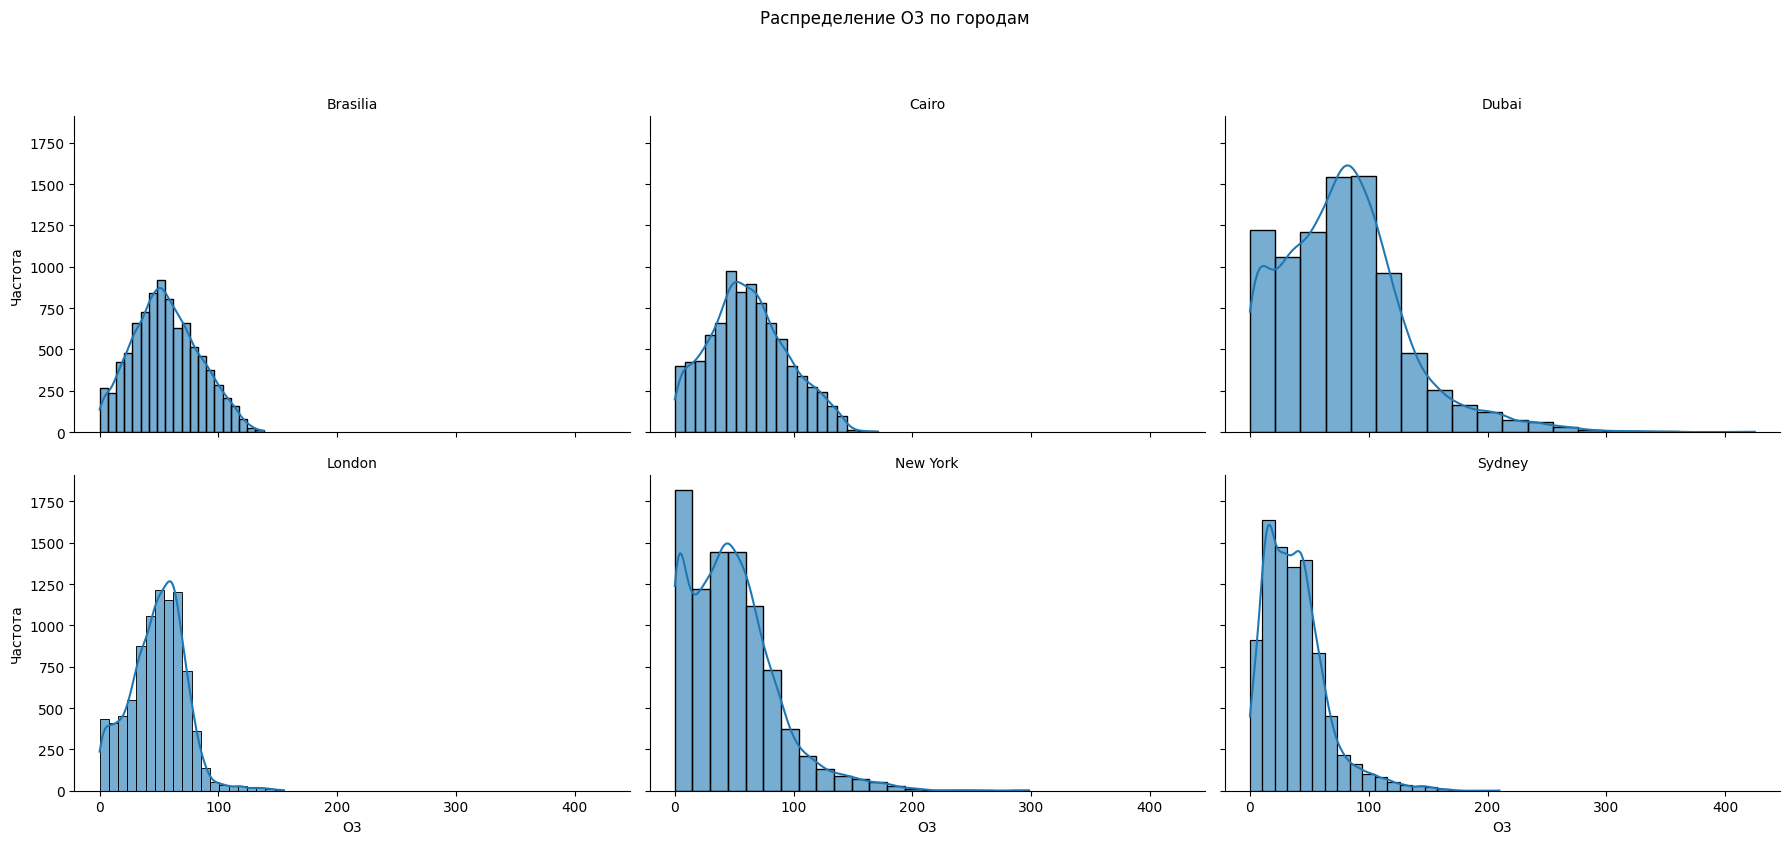

<Figure size 1500x1000 with 0 Axes>

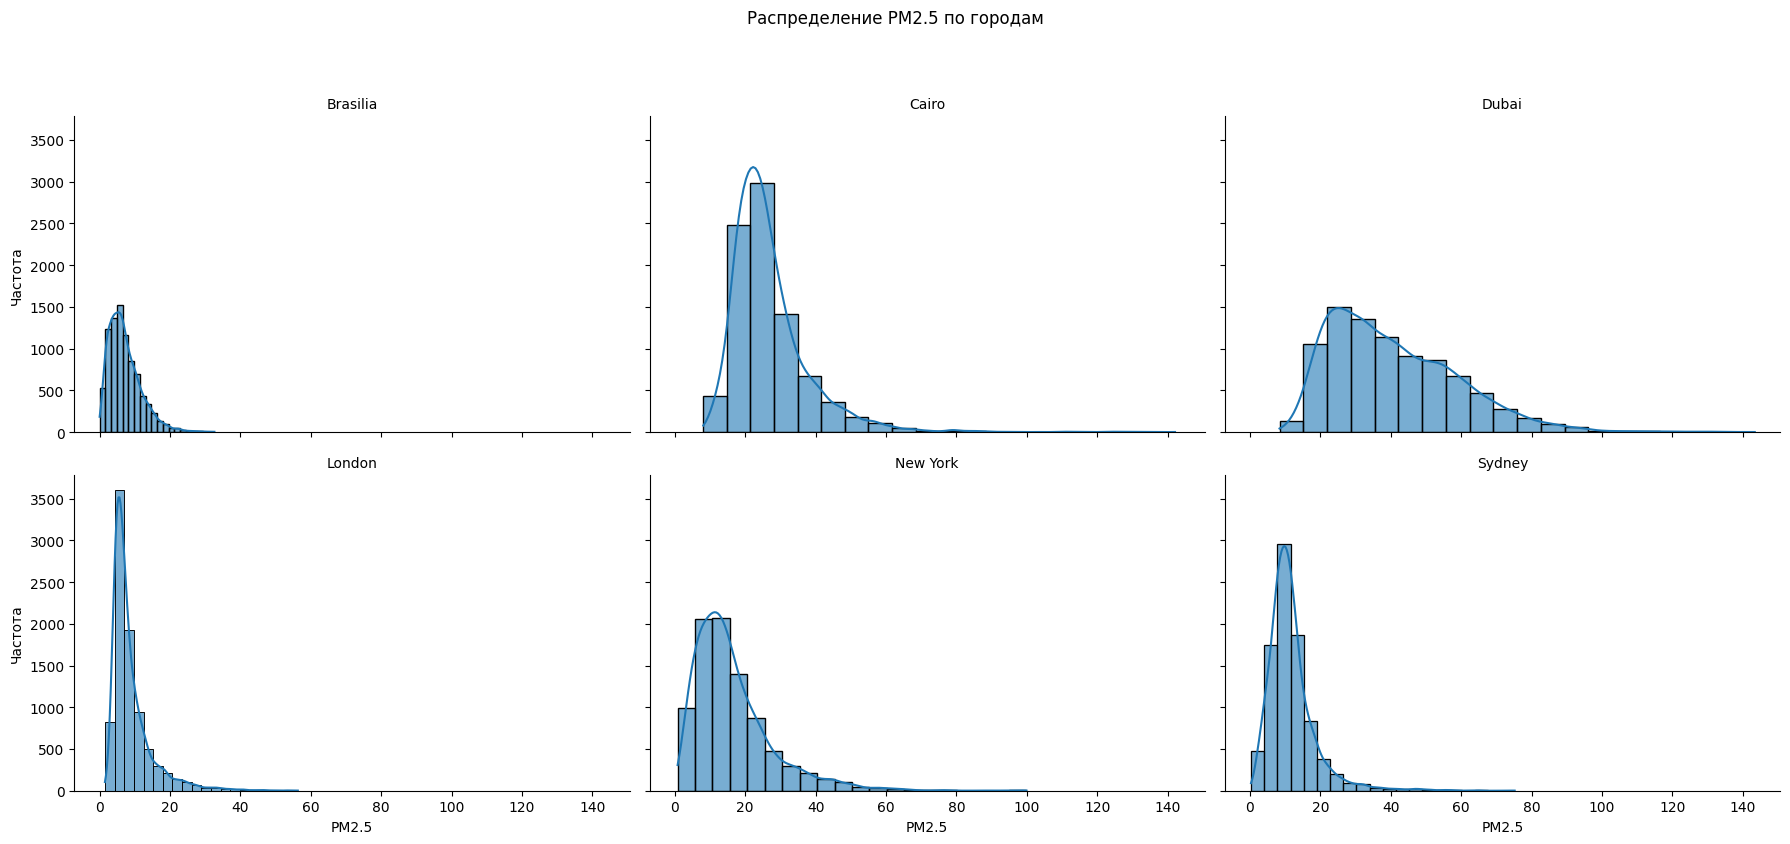

<Figure size 1500x1000 with 0 Axes>

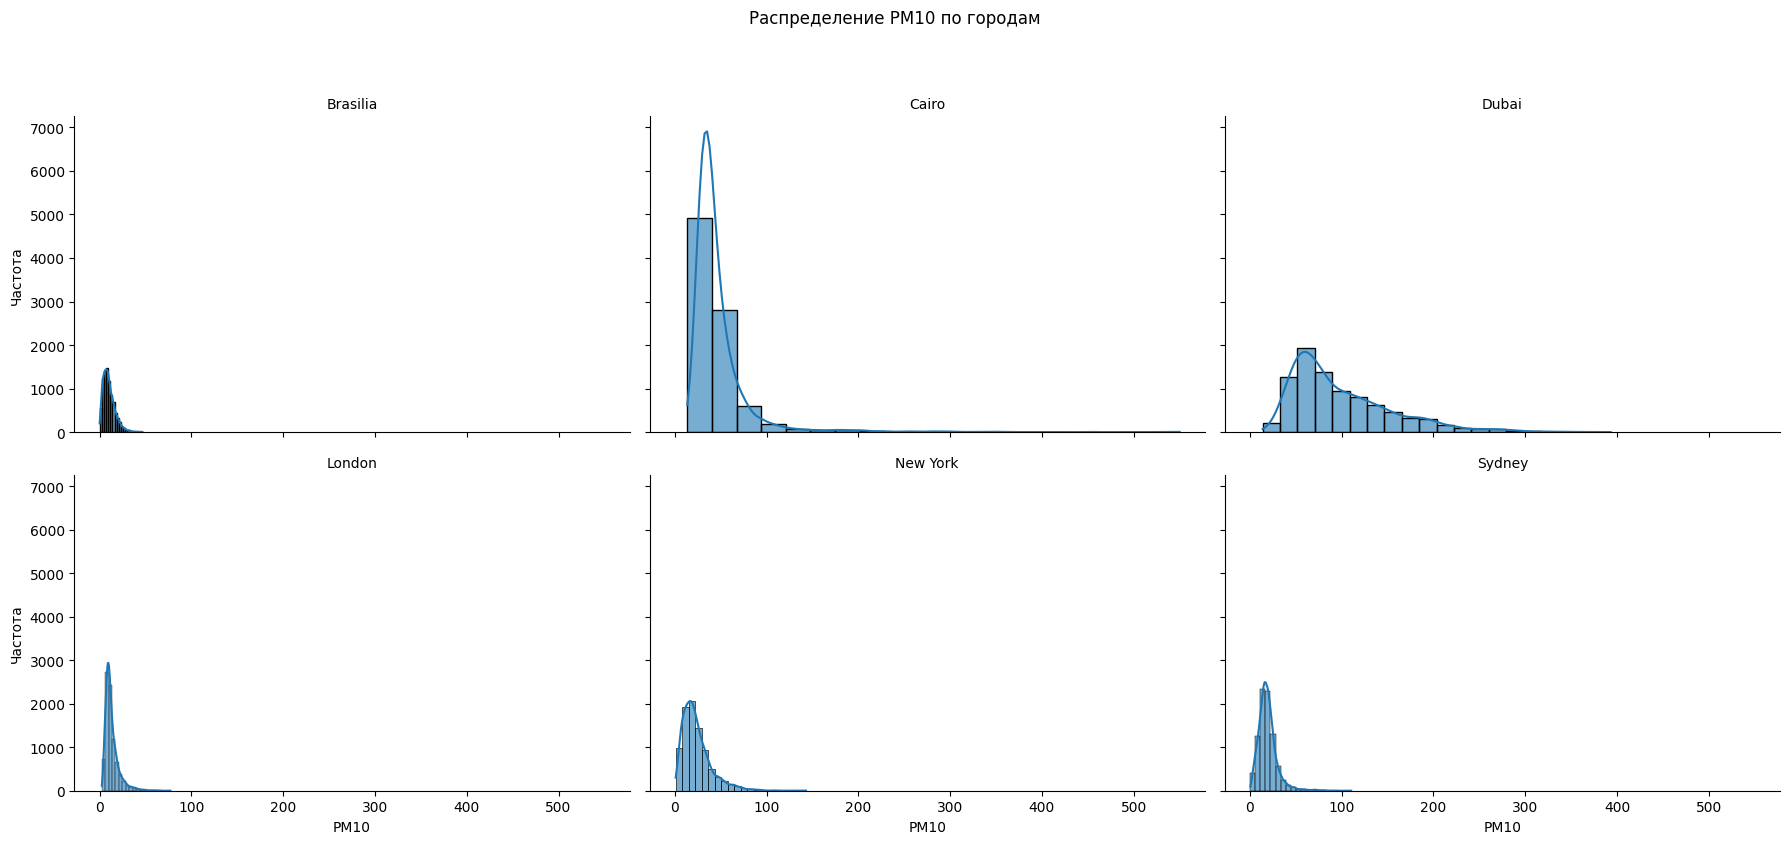

<Figure size 1500x1000 with 0 Axes>

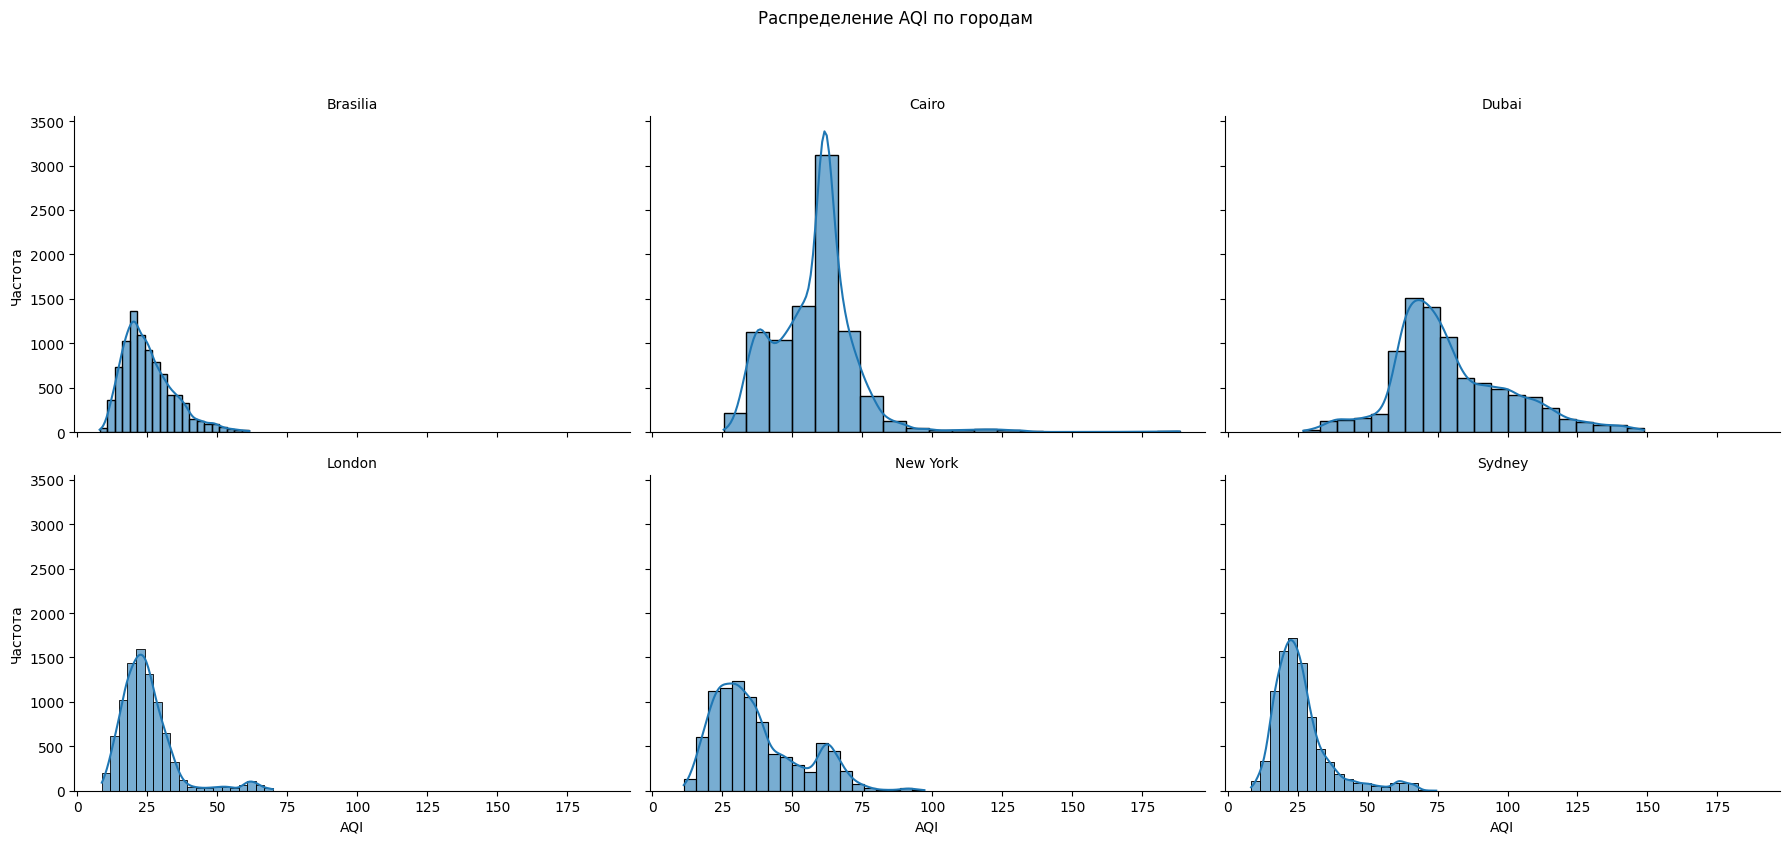

In [5]:
import math
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

main_df = pd.read_csv('Air_Quality.csv', parse_dates=['Date'], encoding='utf-8')



# Heatmap по городам
main_df['Month'] = main_df['Date'].dt.month
main_df['Year'] = main_df['Date'].dt.year
main_df['Month_Year'] = main_df['Date'].dt.to_period('M').astype(str)


heatmap_data = main_df.pivot_table(values='AQI', 
                             index='City', 
                             columns='Month', 
                             aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, 
            annot=True, 
            fmt=".0f",
            cmap="YlGnBu",
            linewidths=0.5)
plt.title('Средний AQI по городам и месяцам', pad=20)
plt.xlabel('Месяц')
plt.ylabel('Город')
plt.tight_layout()
plt.show()



# Радарная(радиальная) диаграмма по городам
stats = main_df.groupby('City').agg({
    'AQI': 'mean',
    'PM2.5': 'mean',
    'PM10': 'mean',
    'NO2': 'mean',
    'SO2': 'mean'
}).reset_index()

categories = ['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2']
N = len(categories)
angles = [n / float(N) * 2 * math.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(math.pi / 2)
ax.set_theta_direction(-1)

for idx, city in enumerate(stats['City']):
    values = stats[stats['City'] == city][categories].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=city)
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories)
plt.yticks(color="grey", size=7)
plt.title('Сравнение городов по ключевым показателям', pad=20)
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.tight_layout()
plt.show()



# Boxplot для анализа выбросов AQI по городам
plt.figure(figsize=(14, 8))
sns.boxplot(x='City', y='AQI', data=main_df,
            palette="Set3",
            showmeans=True,
            meanprops={"marker":"D", 
                      "markerfacecolor":"white", 
                      "markeredgecolor":"black"})

plt.title('Распределение AQI по городам', fontsize=14, pad=20)
plt.xlabel('Город')
plt.ylabel('Индекс AQI')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()




# Гистограммы для каждого показателя по городам
indicators = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']

for indicator in indicators:
    plt.figure(figsize=(15, 10))
    g = sns.FacetGrid(main_df, col='City', col_wrap=3, height=4, aspect=1.5)
    g.map(sns.histplot, indicator, kde=True, bins=20, alpha=0.6)
    g.set_titles("{col_name}")
    g.set_axis_labels(indicator, "Частота")
    plt.suptitle(f'Распределение {indicator} по городам', y=1.05)
    plt.tight_layout()
    plt.show()

